# Contents
* Importing Libraries and Data
* Creating Subset
* Creating Visualizations
* Dickey-Fuller Test

# 1 Importing Libraries and Data

In [1]:
#importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
#importing data
df=pd.read_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\userapi_manipulated_titles.csv'))

In [3]:
#viewing dataset to ensure it's a good choice for time series analysis
df.head(2)

,Unnamed: 0,Gender,Seeking,Age,Pictures,Profile Visits,Kisses,Fans,flirtInterests_chat,flirtInterests_friends,...,lang_fr,lang_en,lang_de,lang_it,lang_es,lang_pt,Verified,lastOnlineDate,lastOnlineTime,User ID
0,0,F,M,25,4,8279,239,0,True,True,...,False,False,True,False,False,False,0,2015-04-25T20:43:26Z,1.429995e+09,55303fc3160ba0eb728b4575
1,1,F,M,22,5,663,13,0,True,True,...,True,False,True,True,False,False,0,2015-04-26T09:19:35Z,1.430040e+09,552e7b61c66da10d1e8b4c82


In [4]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Seeking', 'Age', 'Pictures', 'Profile Visits',
       'Kisses', 'Fans', 'flirtInterests_chat', 'flirtInterests_friends',
       'flirtInterests_date', 'Country', 'City', 'Location', 'distance',
       'isFlirtstar', 'isHighlighted', 'isInfluencer', 'isMobile', 'isNew',
       'isOnline', 'isVip', 'lang_count', 'lang_fr', 'lang_en', 'lang_de',
       'lang_it', 'lang_es', 'lang_pt', 'Verified', 'lastOnlineDate',
       'lastOnlineTime', 'User ID'],
      dtype='object')

# 2 Subseting, wrangling and cleaning data

In [3]:
#resetting index
df=df.reset_index()

In [6]:
df.head(2)

,index,Unnamed: 0,Gender,Seeking,Age,Pictures,Profile Visits,Kisses,Fans,flirtInterests_chat,...,lang_fr,lang_en,lang_de,lang_it,lang_es,lang_pt,Verified,lastOnlineDate,lastOnlineTime,User ID
0,0,0,F,M,25,4,8279,239,0,True,...,False,False,True,False,False,False,0,2015-04-25T20:43:26Z,1.429995e+09,55303fc3160ba0eb728b4575
1,1,1,F,M,22,5,663,13,0,True,...,True,False,True,True,False,False,0,2015-04-26T09:19:35Z,1.430040e+09,552e7b61c66da10d1e8b4c82


In [4]:
#creating dataframe without unnecessary columns
df2=df.drop(columns=['Unnamed: 0', 'Gender', 'Seeking', 'Age', 'Pictures', 'Profile Visits',
       'Kisses', 'Fans', 'flirtInterests_chat', 'flirtInterests_friends',
       'flirtInterests_date', 'isFlirtstar', 'isHighlighted', 'isInfluencer', 'isNew',
       'isVip', 'lang_count', 'lang_fr', 'lang_en', 'lang_de',
       'lang_it', 'lang_es', 'lang_pt', 'Verified'])

In [5]:
#viewing new dataframe
df2.head(2)

,index,Country,City,Location,distance,isMobile,isOnline,lastOnlineDate,lastOnlineTime,User ID
0,0,CH,Rothenburg,Rümlang,175.0,1,0,2015-04-25T20:43:26Z,1.429995e+09,55303fc3160ba0eb728b4575
1,1,CH,Sissach,Sissach,138.0,1,0,2015-04-26T09:19:35Z,1.430040e+09,552e7b61c66da10d1e8b4c82


In [6]:
#viewing time variables to determine if a range needs to be set
df2['lastOnlineDate'].tolist()

['2015-04-25T20:43:26Z',
 '2015-04-26T09:19:35Z',
 '2015-04-06T14:24:07Z',
 '2015-04-07T11:21:01Z',
 '2015-04-06T14:25:20Z',
 '2015-04-08T14:37:51Z',
 '2015-04-27T19:29:58Z',
 '2015-04-08T14:18:11Z',
 '2015-04-07T20:01:55Z',
 '2015-04-06T16:10:49Z',
 '2015-04-26T11:23:41Z',
 '2015-04-08T14:34:25Z',
 '2015-04-06T14:52:17Z',
 '2015-04-26T10:04:30Z',
 '2015-04-08T14:49:55Z',
 '2015-04-26T17:19:17Z',
 '2015-04-06T14:57:34Z',
 '2015-04-25T04:36:43Z',
 '2015-04-26T10:26:08Z',
 '2015-04-25T18:11:13Z',
 '2015-04-26T08:07:07Z',
 '2015-04-08T15:09:19Z',
 '2015-04-25T21:35:40Z',
 '2015-04-06T18:52:15Z',
 '2015-04-07T20:21:17Z',
 '2015-04-25T13:18:14Z',
 '2015-04-26T11:50:47Z',
 '2015-04-06T11:59:59Z',
 '2015-04-26T08:18:01Z',
 '2015-04-08T15:09:04Z',
 '2015-04-08T10:38:36Z',
 '2015-04-08T15:14:36Z',
 '2015-04-07T20:11:54Z',
 '2015-04-08T14:22:46Z',
 '2015-04-26T11:45:05Z',
 '2015-04-08T10:14:15Z',
 '2015-04-26T10:22:03Z',
 '2015-04-07T21:42:20Z',
 '2015-04-08T15:00:57Z',
 '2015-04-26T01:17:35Z',


#### It seems all values are within the year of 2015 in the month of April, so we will create a subset to only include last Online Date

In [10]:
df2.columns

Index(['index', 'Country', 'City', 'Location', 'distance', 'isMobile',
       'isOnline', 'lastOnlineDate', 'lastOnlineTime', 'User ID'],
      dtype='object')

In [5]:
df3=df2.drop(columns=['index', 'Country', 'City', 'Location', 'distance', 'isMobile',
       'isOnline', 'lastOnlineTime', 'User ID'])

In [6]:
#exporting dataframe to excel in order to edit/clean how date is formatted
df3.to_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\OnlineDateIndexWrong.csv'))

In [7]:
#importing editted/clean formatted index
df4=pd.read_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\OnlineDateIndexFixed.csv'))

In [8]:
#viewing data
df4.head()

,datetime,Kisses
0,4/25/2015,239
1,4/26/2015,13
2,4/6/2015,88
3,4/7/2015,1015
4,4/6/2015,1413


In [14]:
# Reset index so that you can use the "Date" column as a filter

timedf = df4.reset_index()

In [15]:
#sorting values
timedf.sort_values('datetime')

,index,datetime,Kisses
2209,2209,3/22/2015,14
709,709,3/22/2015,190
2958,2958,3/22/2015,37
3458,3458,3/22/2015,14
1458,1458,3/22/2015,212
...,...,...,...
2487,2487,5/3/2015,19
2026,2026,5/3/2015,43
2910,2910,5/3/2015,15
2426,2426,5/3/2015,66


In [16]:
timedf.head()

,index,datetime,Kisses
0,0,4/25/2015,239
1,1,4/26/2015,13
2,2,4/6/2015,88
3,3,4/7/2015,1015
4,4,4/6/2015,1413


In [29]:
#creating subset
time_sub = timedf.loc[(timedf['datetime'] >= '3/22/2015') & (timedf['datetime'] < '4/30/2015')]

In [30]:
time_sub.shape

(1545, 3)

In [31]:
# Set the "Date" column as the index

from datetime import datetime

time_sub['datetime'] = pd.to_datetime(time_sub['datetime']) # Create a datetime column from "datetime.""
time_sub = time_sub.set_index('datetime') # Set the datetime as the index of the dataframe
time_sub.head()

,index,Kisses
datetime,,
2015-04-25,0,239
2015-04-26,1,13
2015-04-27,6,492
2015-04-26,10,421
2015-04-26,13,787


# 3 Creating Visualizations

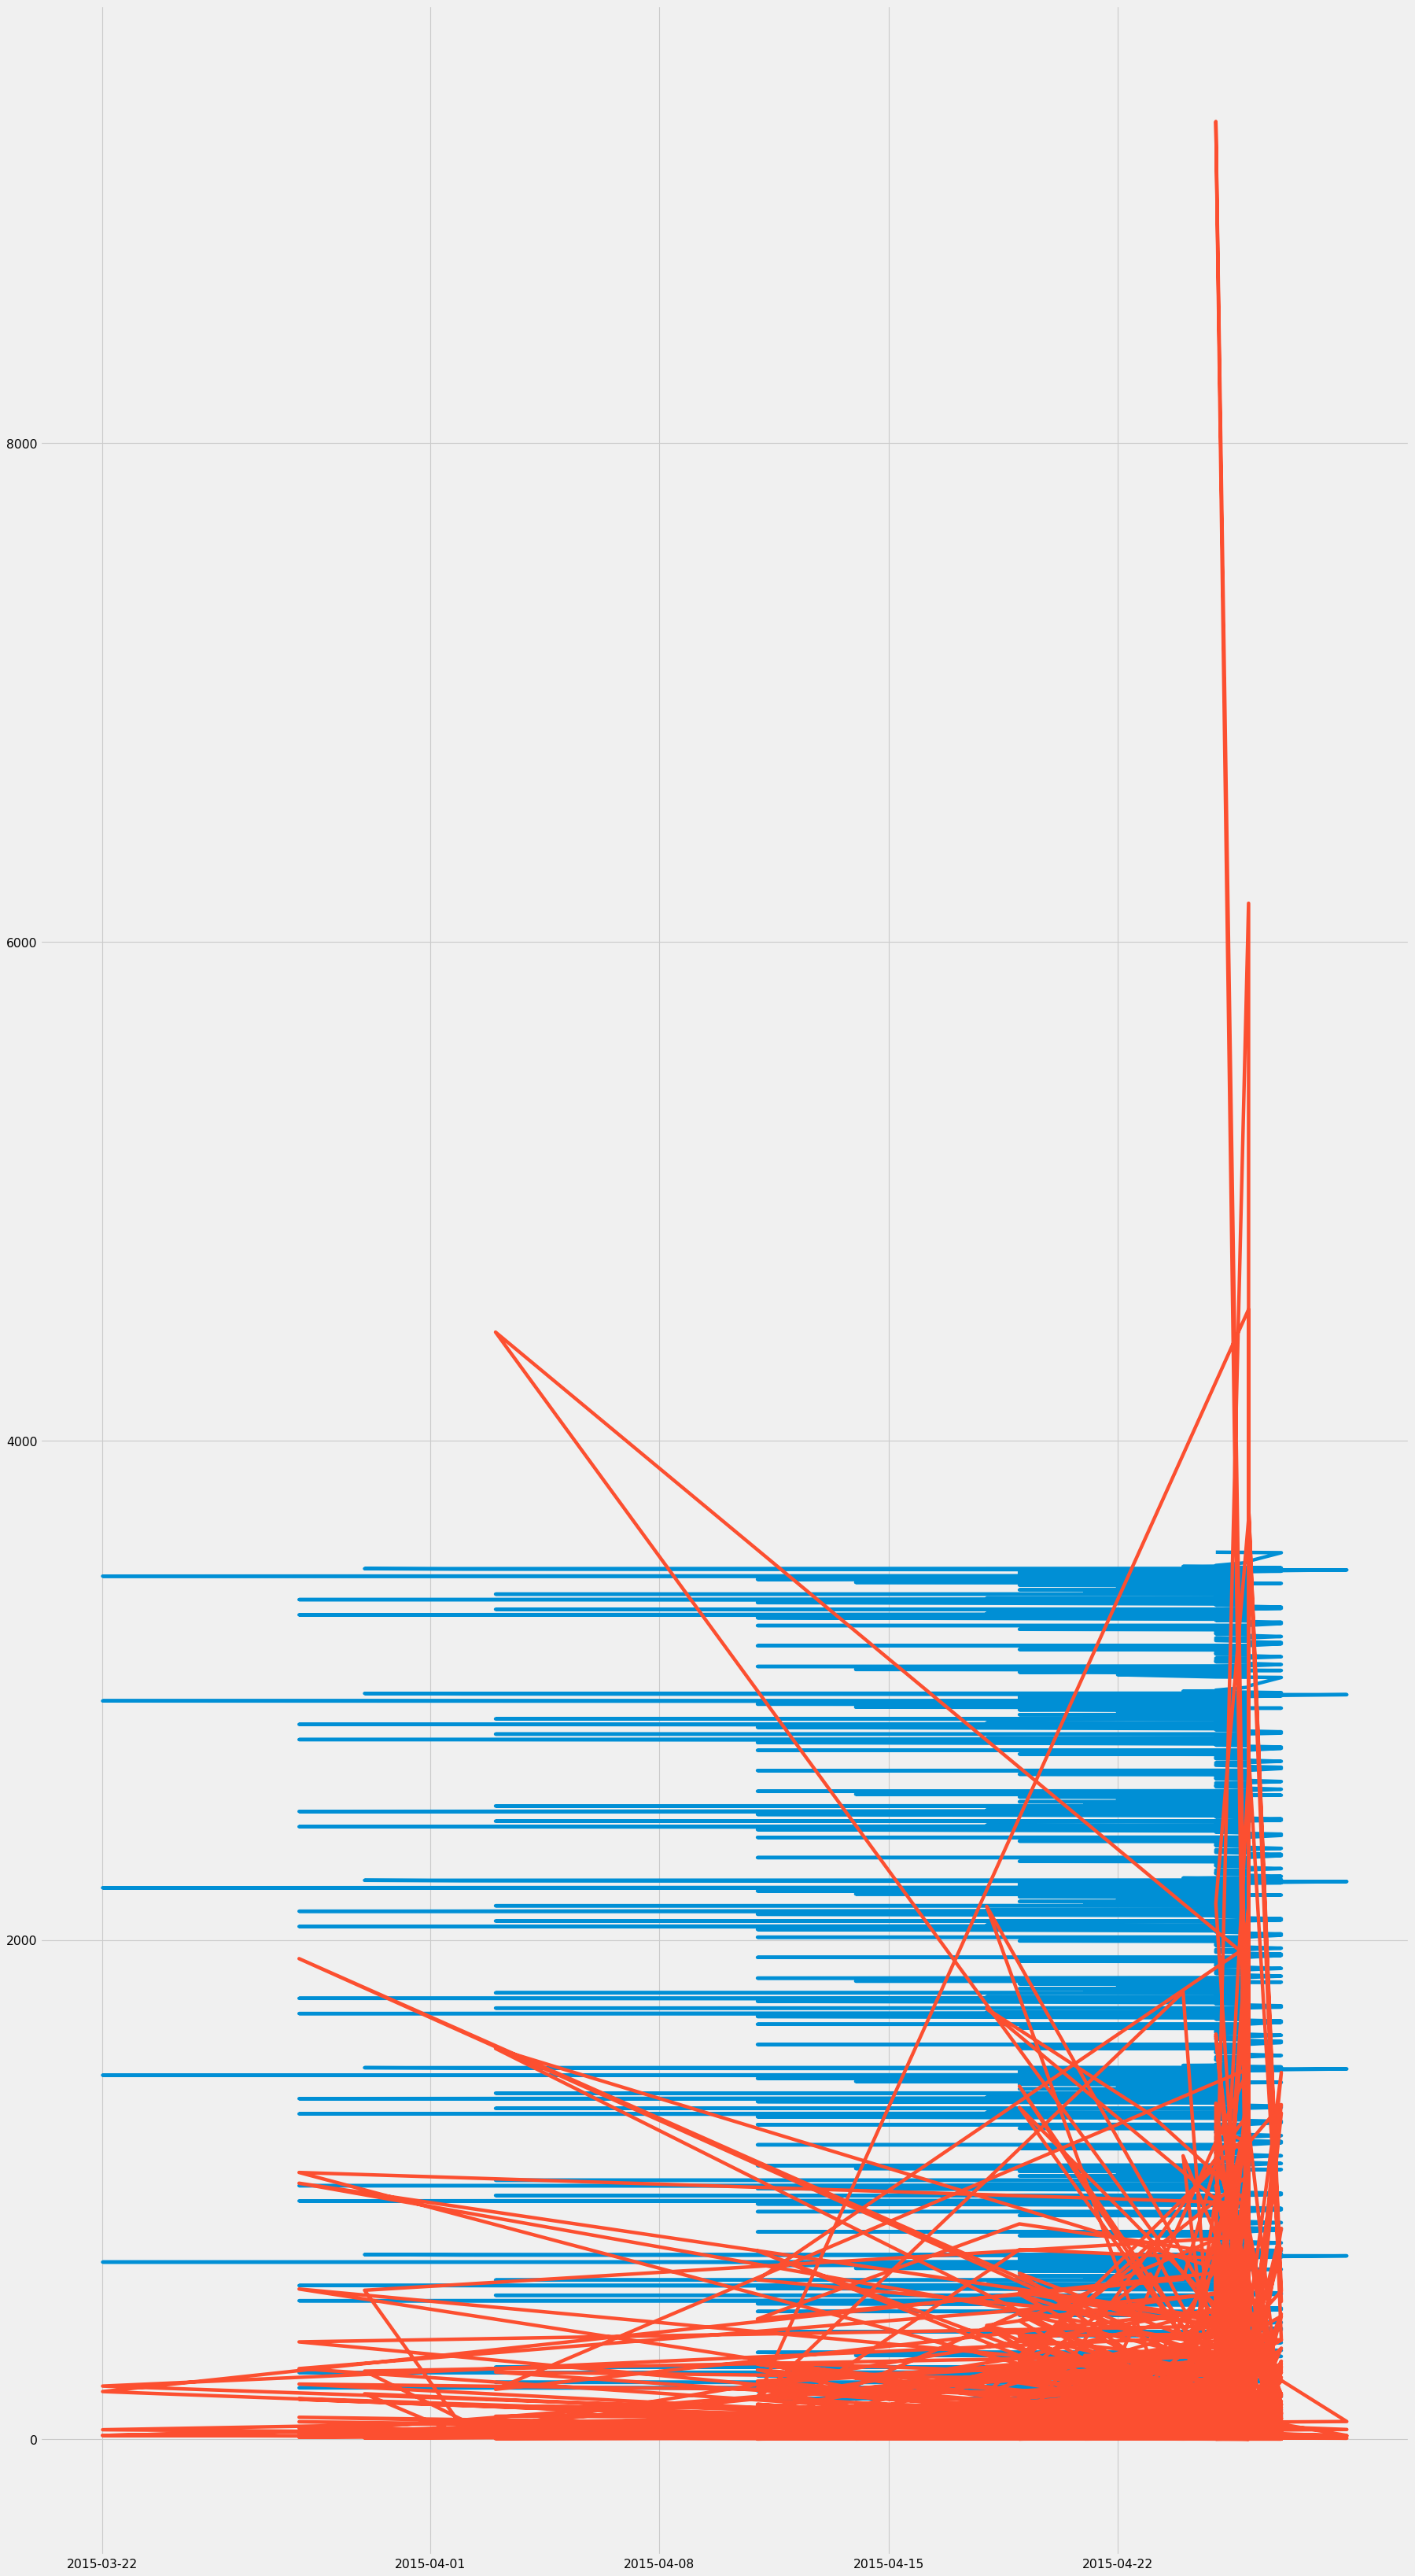

In [32]:
#creating a line chart
timeline= plt.figure(figsize=(25,50),dpi=80)
plt.plot(time_sub)

#### The type of date time data I have may not be appropriate for a line chart, as the data is just measuring the last online time and the amount of kisses/likes a user received, another visualizations may be a more suitable to visualize is users who were recently online get more kisses. I will continue with the task steps.

# 4 Decomposition/Dickey Fuller Test

In [33]:
#decomposing with additive
decompose_result = sm.tsa.seasonal_decompose(time_sub, model='additive', period=1)
decompose_result.plot();

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

#### We are able to actually decompose the data but the plot is not intuitive

In [44]:
#testing for stationarity
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(time_sub['Kisses'])

Dickey-Fuller Stationarity test:
Test Statistic                   -4.022945
p-value                           0.001295
Number of Lags Used              21.000000
Number of Observations Used    1963.000000
Critical Value (1%)              -3.433686
Critical Value (5%)              -2.863013
Critical Value (10%)             -2.567554
dtype: float64


#### My data is stationary as my test statistics is smaller (p<0.05)

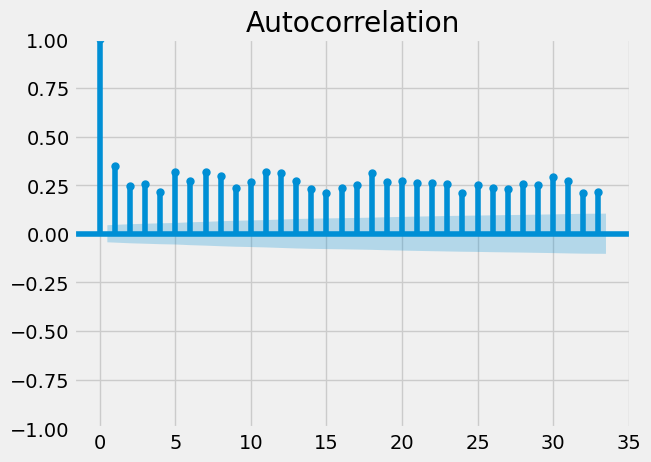

In [45]:
#conducting auto correlation chart
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import the autocorrelation, partial correlation plots

plot_acf(time_sub)
plt.show()